In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
mushrooms = pd.read_csv('./dataset/mushrooms.csv')

le = LabelEncoder()
for i in mushrooms.columns:
    mushrooms[i] = le.fit_transform(mushrooms[i])

cor = mushrooms.corr()
rela = cor['class'].sort_values(ascending = False)
print(rela)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64


In [50]:
X = mushrooms[['gill-size',
 'population',
 'habitat',
 'cap-surface',
 'spore-print-color',
 'veil-color',
 'gill-attachment',
 'cap-shape']]
y = mushrooms['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
dt_gini = DecisionTreeClassifier(max_depth=9, random_state=1)
dt_entropy = DecisionTreeClassifier(max_depth=9, criterion='entropy', random_state=1)

dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=1)

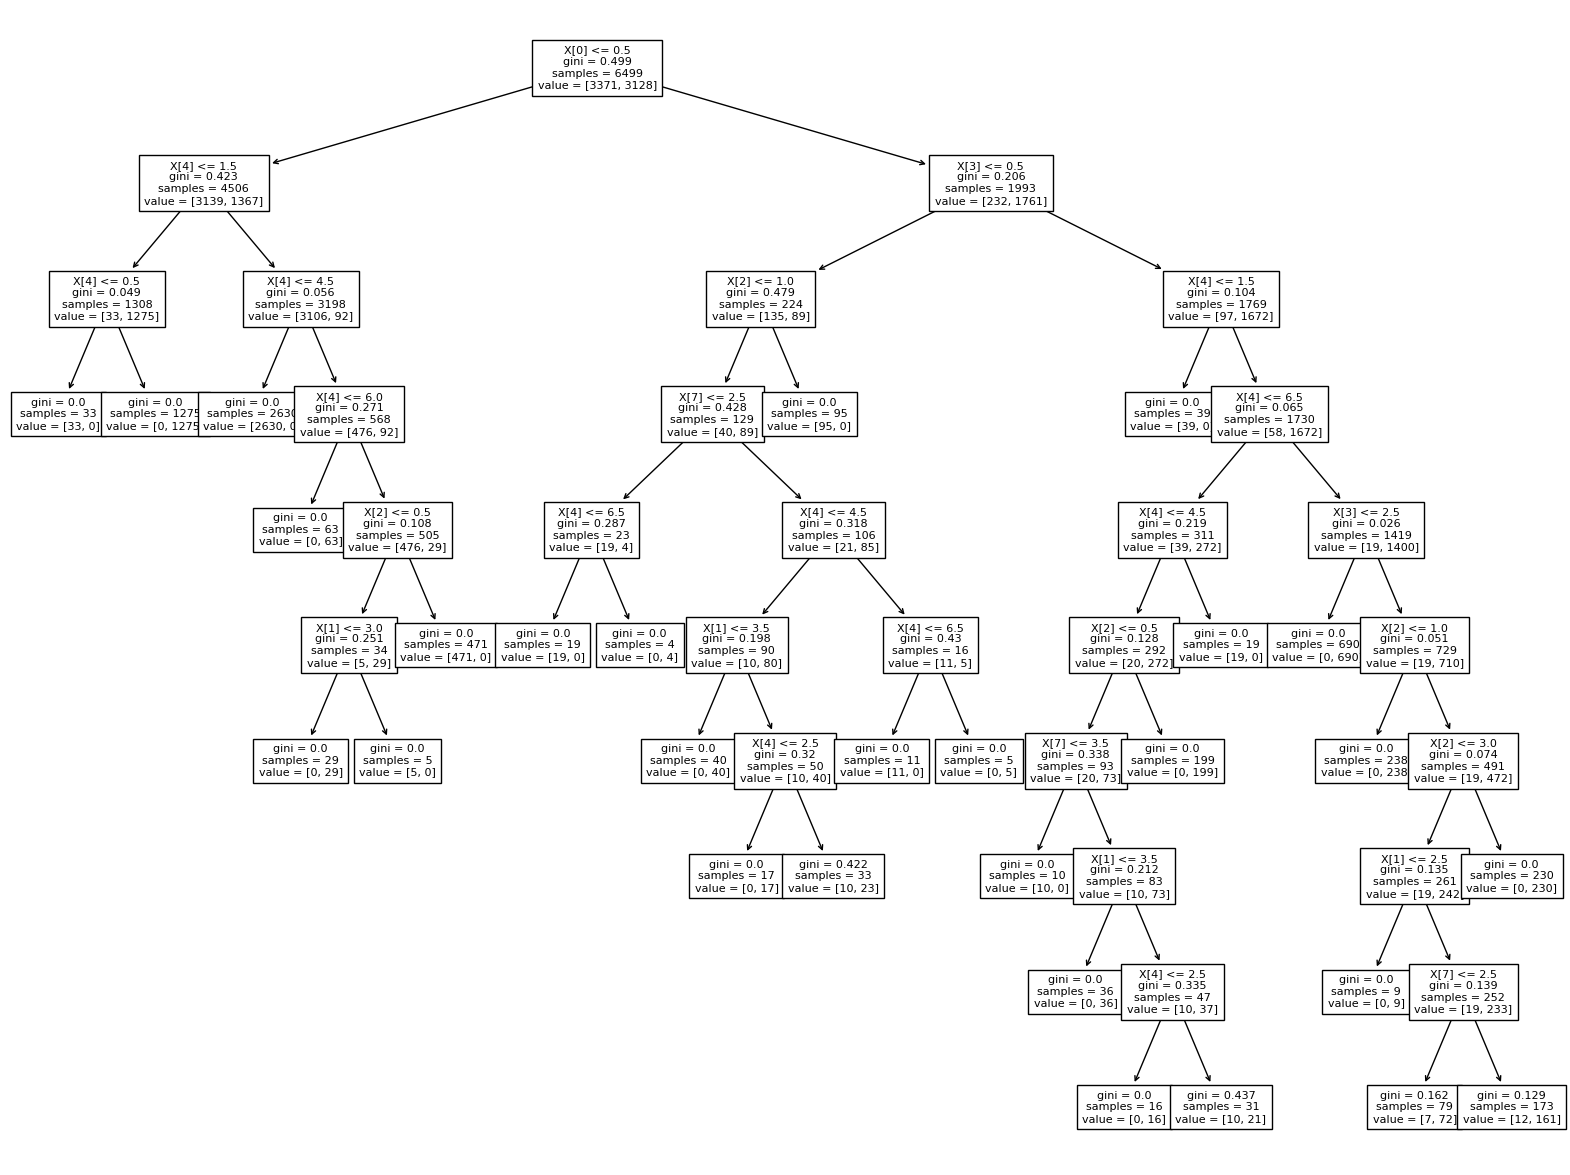

In [51]:
plt.figure(figsize=(20,15))
tree.plot_tree(dt_gini.fit(X_train, y_train), fontsize=8)
plt.show()

In [52]:
# Memprediksi label set test
y_pred = dt_gini.predict(X_test)
print(y_pred[0:5])
y_pred_entropy = dt_entropy.predict(X_test)
print(y_pred_entropy[0:5])

[0 0 0 0 0]
[0 0 0 0 0]


In [53]:
#  menghitung set accuracy
acc_gini = accuracy_score(y_test, y_pred)
acc_entropy = accuracy_score(y_test, y_pred_entropy)
print(acc_gini)
acc_entropy

0.9944615384615385


0.9944615384615385